<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(1_6)_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_1.6'

In [4]:
os.listdir(base_path)

['data_add_delta_1.6_n20.csv',
 'data_add_delta_1.6_n30.csv',
 'data_add_delta_1.6_n60.csv',
 'data_add_delta_1.6_n120.csv',
 'data_add_delta_1.6_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_1.6_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,36.409898,77.766746,84.649983,10.508988,219.335615,210.394323,8.941292
1,0.0,1.0,73.299277,98.089389,85.920011,-24.045340,243.263338,270.019412,-26.756074
2,0.0,2.0,58.300315,23.155259,40.375941,-20.301094,111.530421,129.927115,-18.396694
3,0.0,3.0,76.124409,40.928598,48.197695,-26.300389,148.950312,174.388884,-25.438572
4,0.0,4.0,65.896599,52.675057,80.749789,-9.841017,199.480428,209.168815,-9.688387
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,31.524012,95.954982,72.118412,50.477903,260.075310,217.785313,42.289997
59996,999.0,56.0,85.239744,26.612055,88.664145,1.225400,211.741344,200.830636,10.910708
59997,999.0,57.0,70.442877,44.287894,23.880736,-16.223145,132.388362,160.319767,-27.931405
59998,999.0,58.0,45.322622,58.915231,76.993468,-16.785308,174.446012,192.080838,-17.634826


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,36.409898,77.766746,84.649983,10.508988,219.335615,210.394323,8.941292
1,0.0,1.0,73.299277,98.089389,85.920011,-24.045340,243.263338,270.019412,-26.756074
2,0.0,2.0,58.300315,23.155259,40.375941,-20.301094,111.530421,129.927115,-18.396694
3,0.0,3.0,76.124409,40.928598,48.197695,-26.300389,148.950312,174.388884,-25.438572
4,0.0,4.0,65.896599,52.675057,80.749789,-9.841017,199.480428,209.168815,-9.688387
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,31.524012,95.954982,72.118412,50.477903,260.075310,217.785313,42.289997
59996,999.0,56.0,85.239744,26.612055,88.664145,1.225400,211.741344,200.830636,10.910708
59997,999.0,57.0,70.442877,44.287894,23.880736,-16.223145,132.388362,160.319767,-27.931405
59998,999.0,58.0,45.322622,58.915231,76.993468,-16.785308,174.446012,192.080838,-17.634826


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    36.409898  77.766746  84.649983  ...  219.335615  210.394323   8.941292
      1.0    73.299277  98.089389  85.920011  ...  243.263338  270.019412 -26.756074
      2.0    58.300315  23.155259  40.375941  ...  111.530421  129.927115 -18.396694
      3.0    76.124409  40.928598  48.197695  ...  148.950312  174.388884 -25.438572
      4.0    65.896599  52.675057  80.749789  ...  199.480428  209.168815  -9.688387
...                ...        ...        ...  ...         ...         ...        ...
999.0 55.0   31.524012  95.954982  72.118412  ...  260.075310  217.785313  42.289997
      56.0   85.239744  26.612055  88.664145  ...  211.741344  200.830636  10.910708
      57.0   70.442877  44.287894  23.880736  ...  132.388362  160.319767 -27.931405
      58.0   45.322622  58.915231  76.993468  ...  174.446012  192.080838 -17.634826
      59.0   37.716902  94.953643  74.031661  ...  207.764059  223.764245 -16.000186

[60000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    36.409898  77.766746  84.649983  ...  219.335615  210.394323   8.941292
      1.0    73.299277  98.089389  85.920011  ...  243.263338  270.019412 -26.756074
      2.0    58.300315  23.155259  40.375941  ...  111.530421  129.927115 -18.396694
      3.0    76.124409  40.928598  48.197695  ...  148.950312  174.388884 -25.438572
      4.0    65.896599  52.675057  80.749789  ...  199.480428  209.168815  -9.688387
...                ...        ...        ...  ...         ...         ...        ...
999.0 55.0   31.524012  95.954982  72.118412  ...  260.075310  217.785313  42.289997
      56.0   85.239744  26.612055  88.664145  ...  211.741344  200.830636  10.910708
      57.0   70.442877  44.287894  23.880736  ...  132.388362  160.319767 -27.931405
      58.0   45.322622  58.915231  76.993468  ...  174.446012  192.080838 -17.634826
      59.0   37.716902  94.953643  74.031661  ...  207.764059  223.764245 -16.000186

[60000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,36.409898,77.766746,84.649983,10.508988,219.335615,210.394323,8.941292
1,0.0,1.0,73.299277,98.089389,85.920011,-24.045340,243.263338,270.019412,-26.756074
2,0.0,2.0,58.300315,23.155259,40.375941,-20.301094,111.530421,129.927115,-18.396694
3,0.0,3.0,76.124409,40.928598,48.197695,-26.300389,148.950312,174.388884,-25.438572
4,0.0,4.0,65.896599,52.675057,80.749789,-9.841017,199.480428,209.168815,-9.688387
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,31.524012,95.954982,72.118412,50.477903,260.075310,217.785313,42.289997
59996,999.0,56.0,85.239744,26.612055,88.664145,1.225400,211.741344,200.830636,10.910708
59997,999.0,57.0,70.442877,44.287894,23.880736,-16.223145,132.388362,160.319767,-27.931405
59998,999.0,58.0,45.322622,58.915231,76.993468,-16.785308,174.446012,192.080838,-17.634826


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    36.409898  77.766746  84.649983  ...  219.335615  210.394323   8.941292
      1.0    73.299277  98.089389  85.920011  ...  243.263338  270.019412 -26.756074
      2.0    58.300315  23.155259  40.375941  ...  111.530421  129.927115 -18.396694
      3.0    76.124409  40.928598  48.197695  ...  148.950312  174.388884 -25.438572
      4.0    65.896599  52.675057  80.749789  ...  199.480428  209.168815  -9.688387
...                ...        ...        ...  ...         ...         ...        ...
999.0 55.0   31.524012  95.954982  72.118412  ...  260.075310  217.785313  42.289997
      56.0   85.239744  26.612055  88.664145  ...  211.741344  200.830636  10.910708
      57.0   70.442877  44.287894  23.880736  ...  132.388362  160.319767 -27.931405
      58.0   45.322622  58.915231  76.993468  ...  174.446012  192.080838 -17.634826
      59.0   37.716902  94.953643  74.031661  ...  207.764059  223.764245 -16.000186

[60000 rows x 7 columns]

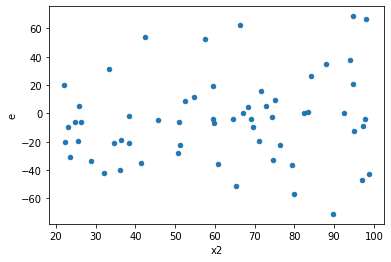

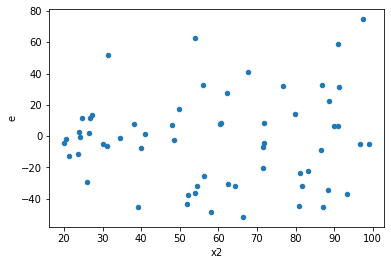

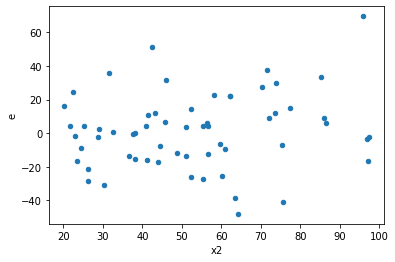

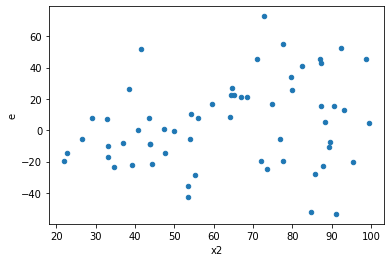

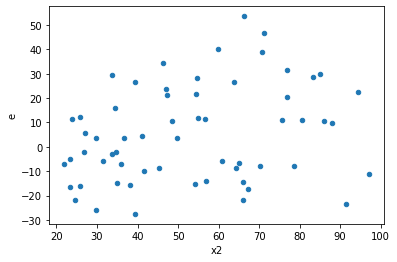

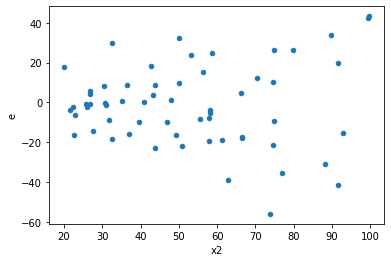

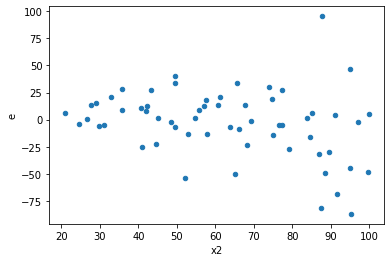

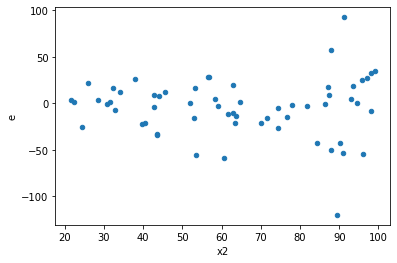

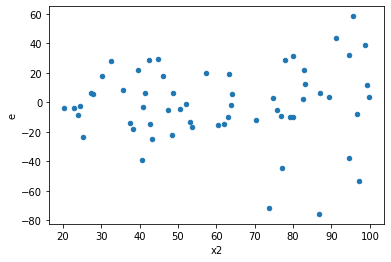

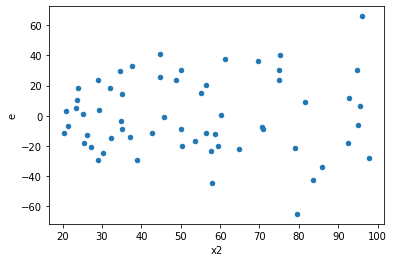

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,21.0,21.0,9981.890130346828,14542.23613211387,475.32810144508704,692.4874348625652,1.45686197125159,0.39559510615964166,0.8022024469201792,0.19779755307982083,Reject005=1 : Homoscedasticity
1.0,21.0,21.0,8704.161831643103,32133.7769749009,414.48389674490966,1530.1798559476617,3.6917715452028697,0.004205111982998,0.997897444008501,0.002102555991499,Reject005=0 : Heteroscedasticity
2.0,21.0,21.0,2267.4954087062733,36187.188701359715,107.97597184315588,1723.1994619695101,15.959101201446943,2.6343630832315057e-08,0.9999999868281846,1.3171815416157528e-08,Reject005=0 : Heteroscedasticity
3.0,21.0,21.0,6383.383403501882,25012.659789854606,303.9706382619944,1191.079037612124,3.918401607544492,0.0028404292673958054,0.9985797853663021,0.0014202146336979027,Reject005=0 : Heteroscedasticity
4.0,21.0,21.0,5858.162140606427,24672.898791337248,278.96010193363935,1174.8999424446308,4.2117131959039895,0.0017410721267085982,0.9991294639366457,0.0008705360633542991,Reject005=0 : Heteroscedasticity
5.0,21.0,21.0,5999.431547687294,18358.70515995309,285.6872165565378,874.2240552358614,3.060074111026426,0.013459351326737146,0.9932703243366314,0.006729675663368573,Reject005=0 : Heteroscedasticity
6.0,21.0,21.0,6350.08472993454,24865.03469247176,302.38498713973996,1184.0492710700837,3.9157012465136165,0.002853527631199171,0.9985732361844004,0.0014267638155995854,Reject005=0 : Heteroscedasticity
7.0,21.0,21.0,4305.237534804394,29867.485149185824,205.01131118116163,1422.2611975802774,6.937476714752938,4.06262149350578e-05,0.9999796868925325,2.03131074675289e-05,Reject005=0 : Heteroscedasticity
8.0,21.0,21.0,6431.566355932308,17847.531889524646,306.26506456820516,849.8824709297451,2.774989932749827,0.023568319206123123,0.9882158403969384,0.011784159603061561,Reject005=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,21.0,21.0,9981.890130346828,14542.23613211387,475.32810144508704,692.4874348625652,1.45686197125159,0.39559510615964166,Reject005=1 : Homoscedasticity
1.0,21.0,21.0,8704.161831643103,32133.7769749009,414.48389674490966,1530.1798559476617,3.6917715452028697,0.004205111982998,Reject005=0 : Heteroscedasticity
2.0,21.0,21.0,2267.4954087062733,36187.188701359715,107.97597184315588,1723.1994619695101,15.959101201446943,2.6343630832315057e-08,Reject005=0 : Heteroscedasticity
3.0,21.0,21.0,6383.383403501882,25012.659789854606,303.9706382619944,1191.079037612124,3.918401607544492,0.0028404292673958054,Reject005=0 : Heteroscedasticity
4.0,21.0,21.0,5858.162140606427,24672.898791337248,278.96010193363935,1174.8999424446308,4.2117131959039895,0.0017410721267085982,Reject005=0 : Heteroscedasticity
5.0,21.0,21.0,5999.431547687294,18358.70515995309,285.6872165565378,874.2240552358614,3.060074111026426,0.013459351326737146,Reject005=0 : Heteroscedasticity
6.0,21.0,21.0,6350.08472993454,24865.03469247176,302.38498713973996,1184.0492710700837,3.9157012465136165,0.002853527631199171,Reject005=0 : Heteroscedasticity
7.0,21.0,21.0,4305.237534804394,29867.485149185824,205.01131118116163,1422.2611975802774,6.937476714752938,4.06262149350578e-05,Reject005=0 : Heteroscedasticity
8.0,21.0,21.0,6431.566355932308,17847.531889524646,306.26506456820516,849.8824709297451,2.774989932749827,0.023568319206123123,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    781
Reject005=1 : Homoscedasticity      219
Name: Result_test, dtype: int64